In [ ]:
import numpy as np
import pandas as pd
import nltk
import spacy
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_colwidth", 200)

%matplotlib inline

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
'''
docs = ['The root causes were identified as follows: Root Cause for Sub-Problem 1: Inadequate procedural guidance and unclear coordination between applicable proceduers',
            'This ultimately created an environment that promulgated a human error-likely environment.” More specifically, the RCE team determined that the environment consisted of poor communication, lack of engineering leadership, too much reliance on vendor designs, time pressure, and distractions. ',
            'Also, equipment problems due to aging have led to an increasingly negative trend in the station’s Deficient Critical Component Backlog Orders. ',
             'Mr. Baldwin stated the deficient performance was caused by maintenance procedural inadequacy which allowed work to proceed with the relay energized.'
            ]
'''

In [ ]:
#len(docs)

4

In [ ]:
#for sentence in sentences1:
#    doc=nlp(sentence)

In [ ]:
#docs[2]

'Also, equipment problems due to aging have led to an increasingly negative trend in the station’s Deficient Critical Component Backlog Orders. '

In [ ]:
#clean_articles = [re.sub("[^a-zA-Z]"," ",x) for x in docs]

In [ ]:
#docs[2]

'Also, equipment problems due to aging have led to an increasingly negative trend in the station’s Deficient Critical Component Backlog Orders. '

In [ ]:
#clean_articles[2]

'Also  equipment problems due to aging have led to an increasingly negative trend in the station s Deficient Critical Component Backlog Orders  '

In [ ]:
#clean_articles = [' '.join([w for w in x.split() if len(w)>1]) for x in clean_articles]

In [ ]:
#clean_articles = [x.lower() for x in clean_articles]

In [ ]:
# function to plot top 30 most frequent words
def freq_words(x, terms = 30):
  # combine all the articles  
  text = ' '.join([text for text in x])
  # split text into words   
  all_words = text.split()
  
  # prepare a dictionary of word-frequency pairs
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
   
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

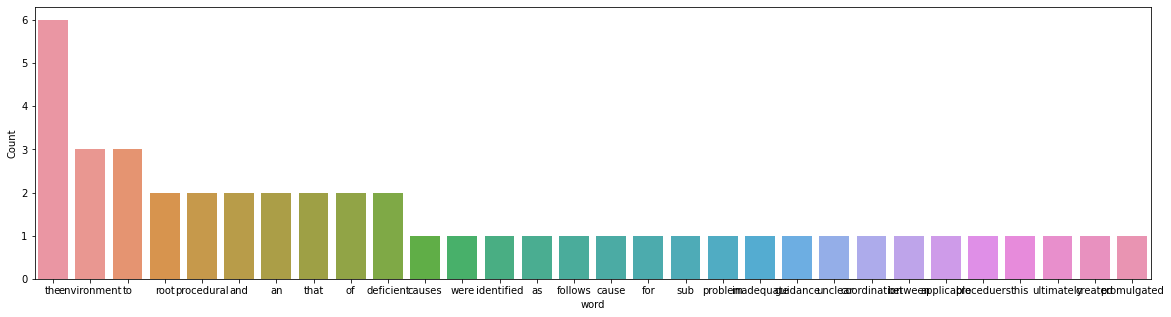

In [ ]:
#freq_words(clean_articles)

In [ ]:
!pip install pdfplumber -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.6/143.6 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 11.6 MB/s eta 0:00:00


In [ ]:
import pdfplumber

all_sentences = []
with pdfplumber.open(r'DCISC-24th-Annual-Report.pdf') as pdf:
    page_numbers = len(pdf.pages)
    for num in range(page_numbers):
        page = pdf.pages[num]
        page_text = page.extract_text()
        page_text = page_text.replace('\n'," ")
        page_sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', page_text)
        all_sentences.append(page_sentences)

In [ ]:
len(all_sentences)

931

In [ ]:
all_sentences[3]

['The candidates must be “persons with knowledge, background and experience in the field of nuclear power facilities and nuclear safety issues.” From the list of candidates, the new or returning member is appointed by the Governor of California, the Attorney General of California or the Chairperson of the California Energy Commission (CEC), whichever made the original appointment.',
 'The Committee Members during this period were as follows: On October 10, 2007, Robert J.',
 'Budnitz, Ph.D., was appointed by California Attorney General Edmund G.',
 'Brown Jr. to a term on the Committee expiring June 30, 2010.',
 'On April 15, 2010, Attorney General Brown announced the reappointment of Dr. Budnitz to a second three-year term on the Committee commencing July 1, 2010 through June 30, 2013.',
 'At a regular meeting on June 27, 2013, the CPUC ratified its President’s selection of Dr. Budnitz as one of two candidates for appointment by Attorney General Kamala Harris to serve a three-year ter

In [ ]:
#clean_articles = [re.sub("[^a-zA-Z]"," ",x) for x in all_sentences]
docu=[]
for page in all_sentences:
  docu.append(page)

In [ ]:
len(docu)

931

In [ ]:
docu[2]

['24th Annual Report by the Diablo Canyon Independent Safety Committee, July 1, 2013 - June 30, 2014 Preface | Executive Summary Volume 1 TOC | Volume 2 TOC | PG&E Response | Contact the DCISC 24th Annual Report, Executive Summary, Conclusions and Recommendations History and Introduction The Diablo Canyon Independent Safety Committee (DCISC) was established as part of the June 24, 1988 settlement agreement which arose from the rate proceedings for the Diablo Canyon Nuclear Power Plant (DCPP).',
 'The DCISC was formed in late 1989 with the appointments of Committee Members and began formal review activities and meetings on January 1, 1990.',
 'The original settlement agreement (D.88-12-083) was terminated by the California Public Utilities Commission (CPUC) in its decision to open the state electricity markets to competition on January 1, 1998; however, under the provisions of the Commission’s Decisions 97-05-088, issued on May 21, 1997, and 04-05-055, issued on May 27, 2004, the DCISC 

In [ ]:
clean_articles=[]
for i in range(len(docu)):
  clean_articles.append([re.sub("[^a-zA-Z]"," ",x) for x in docu[i]])
for i in range(len(docu)):
  clean_articles.append([' '.join([w for w in x.split() if len(w)>1]) for x in clean_articles[i]])
for i in range(len(docu)):
  clean_articles.append([x.lower() for x in clean_articles[i]])

In [ ]:
len(clean_articles)

2793

In [ ]:
clean_articles[9]

['problems and failures increased the frequency of Critical Event Clock Resets in the second half of      ',
 'Also  equipment problems due to aging have led to an increasingly negative trend in the station s Deficient Critical Component Backlog Orders ',
 'DCPP s performance on reducing or eliminating Safety System Functional Failures has not improved despite implementation of a corrective action plan ',
 'DCPP s Root Cause Evaluation of Unit   s trip from     percent power following a failure on the    kV Main Bank Transformer B phase lightning arrester is extensive and appears to be reasonable ',
 '            ',
 'DCPP s operational performance  measured by various statistical parameters  during       and into       is representative of the continuation of a generally improving trend since at least      ',
 'This trend is especially reflected in improvements in outage management and collective radiation exposure and in avoiding NRC Substantive Cross cutting Issues ',
 'Areas that D

In [ ]:
#for i in range(len(clean_articles)):
#  clean_articles.append([' '.join([w for w in x.split() if len(w)>1]) for x in clean_articles[i]])
#  clean_articles.append([x.lower() for x in clean_articles[i]])


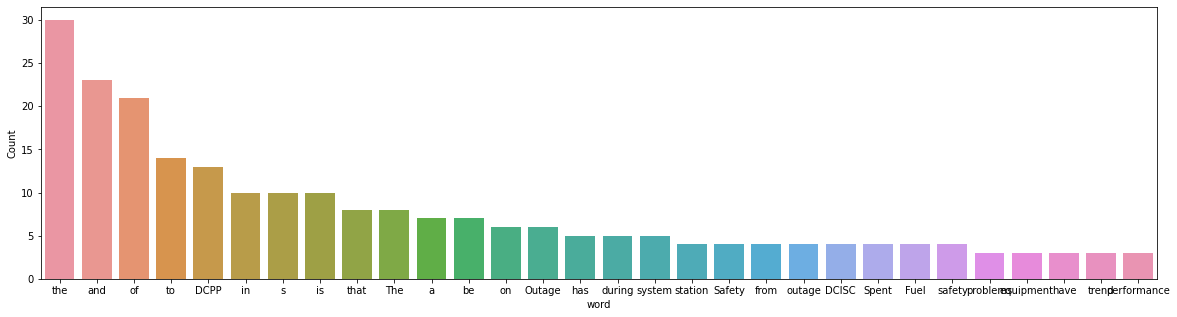

In [ ]:
freq_words(clean_articles[9])

In [ ]:
#flatten the list
#clean_articles = [item for sublist in clean_articles for item in sublist]


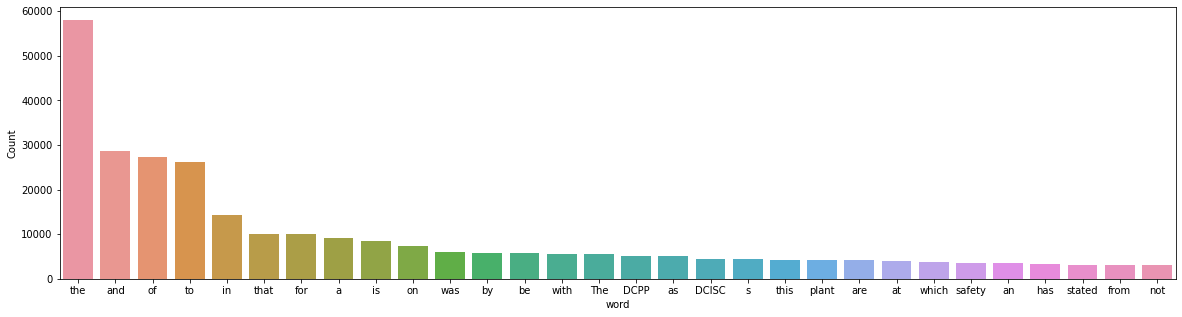

In [ ]:
#freq_words(clean_articles)

In [ ]:
df=clean_articles.copy()

In [ ]:
df[9]

['problems and failures increased the frequency of Critical Event Clock Resets in the second half of      ',
 'Also  equipment problems due to aging have led to an increasingly negative trend in the station s Deficient Critical Component Backlog Orders ',
 'DCPP s performance on reducing or eliminating Safety System Functional Failures has not improved despite implementation of a corrective action plan ',
 'DCPP s Root Cause Evaluation of Unit   s trip from     percent power following a failure on the    kV Main Bank Transformer B phase lightning arrester is extensive and appears to be reasonable ',
 '            ',
 'DCPP s operational performance  measured by various statistical parameters  during       and into       is representative of the continuation of a generally improving trend since at least      ',
 'This trend is especially reflected in improvements in outage management and collective radiation exposure and in avoiding NRC Substantive Cross cutting Issues ',
 'Areas that D

In [ ]:
'''
for i in range(len(df)):

  # lemmatization
  df.append([' '.join([token.lemma_ for token in nlp(x)]) for x in df[i]])

for i in range(len(df)):
  # remove stopwords
  df.append([' '.join([w for w in x.split() if nlp.vocab[w].is_stop==False]) for x in df[i]])

for i in range(len(df)):
  # remove -PRON- tags
  df.append([re.sub('-PRON-',  '', i) for i in df[i]])
'''

In [ ]:
df[9]

['problems and failures increased the frequency of Critical Event Clock Resets in the second half of      ',
 'Also  equipment problems due to aging have led to an increasingly negative trend in the station s Deficient Critical Component Backlog Orders ',
 'DCPP s performance on reducing or eliminating Safety System Functional Failures has not improved despite implementation of a corrective action plan ',
 'DCPP s Root Cause Evaluation of Unit   s trip from     percent power following a failure on the    kV Main Bank Transformer B phase lightning arrester is extensive and appears to be reasonable ',
 '            ',
 'DCPP s operational performance  measured by various statistical parameters  during       and into       is representative of the continuation of a generally improving trend since at least      ',
 'This trend is especially reflected in improvements in outage management and collective radiation exposure and in avoiding NRC Substantive Cross cutting Issues ',
 'Areas that D

In [ ]:
'''
# remove single character terms
for i in range(len(df)):
  df.append([' '.join([w for w in x.split() if len(w)>1]) for x in df[i]])
'''

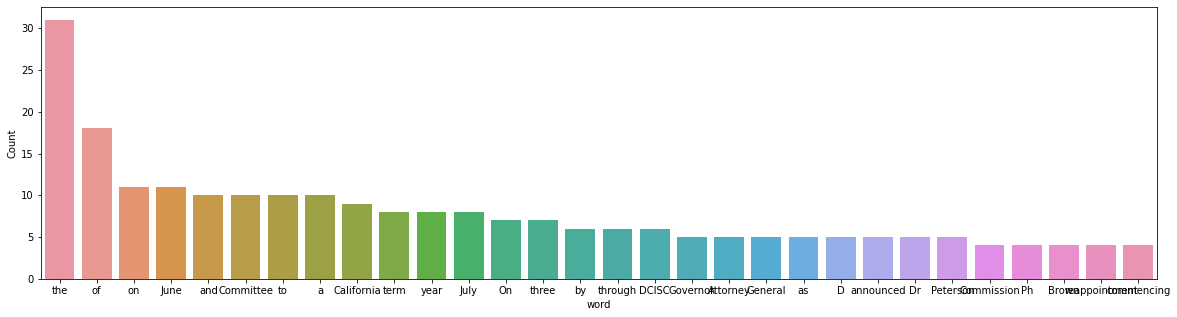

In [ ]:
#freq_words(df[9])

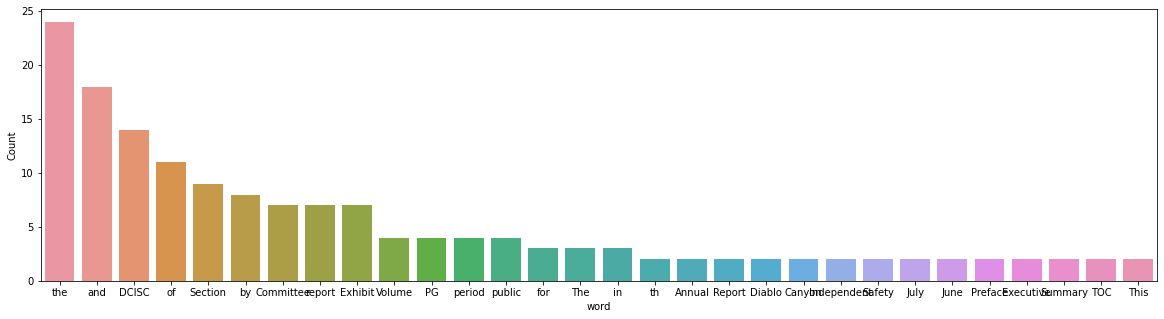

In [ ]:
#50 words and not 30
#freq_words(df[10])

In [ ]:
import re
import spacy

# load the spacy model and stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words

# assume that 'df' is a list of lists containing strings
for i in range(len(df)):
    # join the list into a single string
    text = ' '.join(df[i])
    
    # remove single character terms
    terms_list = [word for word in text.split() if len(word) > 1]
    
    # lemmatization
    lemma_list = [token.lemma_ for token in nlp(' '.join(terms_list))]
    
    # remove stopwords and -PRON- tags
    clean_list = [re.sub('-PRON-', '', word) for word in lemma_list if word not in stop_words]
    
    # join the cleaned tokens back into a string
    clean_text = ' '.join(clean_list)
    
    # assign the cleaned text back to 'df'
    df[i] = clean_text


In [ ]:
def get_words(x):
  # combine all the articles  
  text = ' '.join([text for text in x])
  # split text into words   
  return set(text.split())
unique_words=[]
# unique words in the articles
for i in range(len(df)):
  unique_words.append(get_words(df[i]))

len(unique_words)

2793

In [ ]:
df[9]

'problem failure increase frequency critical Event Clock Resets second half equipment problem aging lead increasingly negative trend station Deficient Critical Component Backlog Orders dcpp performance reduce eliminate Safety System Functional Failures improve despite implementation corrective action plan DCPP Root Cause Evaluation Unit trip percent power follow failure kV Main Bank Transformer phase lightning arrester extensive appear reasonable dcpp operational performance measure statistical parameter representative continuation generally improve trend trend especially reflect improvement outage management collective radiation exposure avoid NRC Substantive Cross cut issue area DCISC consider future review include Equipment Reliability Human performance implementation Corrective Action Program DCPP deal effectively equipment system problem focus improve system health Systems source emergency electrical power station vital electrical equipment station Emergency Diesel Generators kv s

# The code below needs to improved/adjusted. The code above has been optimized.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
    
X = vectorizer.fit_transform(df)

X.shape

(2793, 6527)

In [ ]:
import pandas as pd

# Assume X is a regular matrix and vectorizer is a CountVectorizer object
X = vectorizer.fit_transform(df)
feature_names = vectorizer.get_feature_names()

X_df = pd.DataFrame(X.toarray(), columns=feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_df.iloc[:10,1000:1020]

,collusion,color,column,com,comanche,combination,combine,combined,combustible,combustion,come,comfort,comfortable,comm,command,commence,commencement,commend,commendable,commendably
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.175459,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.073285,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
8,0.0,0.0,0.0,0.072058,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.050946,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [ ]:
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(max_features= 1500, # keeping top 1000 most important terms 
                             min_df= 5,
                             max_df = 0.9)
    
X = vectorizer.fit_transform(df)

X.shape

(2793, 1500)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=10, random_state=12, n_iter=200)

In [ ]:
svd_model.fit(X)

TruncatedSVD(n_components=10, n_iter=200, random_state=12)

In [ ]:
# get column names of document term matrix
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:50]
    
    print("Trait "+str(i)+": ")
    traits = []
    for t in sorted_terms:
        traits.append(t[0])
    
    print(traits)
    #print('\n')

Trait 0: 
['dcisc', 'dcpp', 'mr', 'report', 'committee', 'safety', 'dr', 'public', 'state', 'system', 'plant', 'review', 'nrc', 'meeting', 'fuel', 'nuclear', 'pg', 'performance', 'program', 'issue', 'fact', 'volume', 'canyon', 'diablo', 'power', 'action', 'annual', 'follow', 'outage', 'design', 'find', 'member', 'plan', 'seismic', 'unit', 'response', 'event', 'june', 'provide', 'ms', 'station', 'equipment', 'team', 'include', 'use', 'control', 'reactor', 'budnitz', 'independent', 'work']
Trait 1: 
['committee', 'public', 'canyon', 'diablo', 'volume', 'annual', 'meeting', 'report', 'toc', 'th', 'dcisc', 'june', 'member', 'tour', 'independent', 'july', 'exhibit', 'pg', 'summary', 'agenda', 'dr', 'contact', 'matter', 'section', 'preface', 'california', 'executive', 'comment', 'safety', 'nuclear', 'approve', 'october', 'ii', 'response', 'legal', 'peterson', 'san', 'teleconference', 'avila', 'chair', 'session', 'notice', 'twenty', 'request', 'luis', 'receive', 'list', 'counsel', 'discussion

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lsa_topic_matrix = svd_model.transform(X)
lsa_topic_matrix.shape

(2793, 10)

In [ ]:
lsa_topic_matrix[41]

array([ 0.40635807,  0.39586239, -0.29766897,  0.03789144,  0.03855703,
       -0.13396371, -0.13095958,  0.02019199, -0.19255946, -0.02668518])

In [ ]:
len(clean_articles)

34506

In [ ]:
df[9]

'problem failure increase frequency critical Event Clock Resets second half equipment problem aging lead increasingly negative trend station Deficient Critical Component Backlog Orders dcpp performance reduce eliminate Safety System Functional Failures improve despite implementation corrective action plan DCPP Root Cause Evaluation Unit trip percent power follow failure kV Main Bank Transformer phase lightning arrester extensive appear reasonable dcpp operational performance measure statistical parameter representative continuation generally improve trend trend especially reflect improvement outage management collective radiation exposure avoid NRC Substantive Cross cut issue area DCISC consider future review include Equipment Reliability Human performance implementation Corrective Action Program DCPP deal effectively equipment system problem focus improve system health Systems source emergency electrical power station vital electrical equipment station Emergency Diesel Generators kv s

In [ ]:
lsa_topic_matrix[9]

array([ 0.45347092, -0.33438157, -0.15775993,  0.15810301,  0.06477593,
        0.09158535, -0.06700183, -0.03110965, -0.01485701,  0.12641723])

In [ ]:
np.argmax(lsa_topic_matrix[9])

0

In [ ]:
np.argmax(lsa_topic_matrix[10])

0

In [ ]:
lsa_topic_matrix[10]

array([ 0.4487118 , -0.13049787, -0.04500933, -0.01223719,  0.03991346,
       -0.06707899, -0.06951463,  0.30783402, -0.04588156, -0.07169738])

In [ ]:
np.argmax(lsa_topic_matrix[42])

1

In [ ]:
lsa_topic_matrix[42]

array([ 0.34810117,  0.43179873, -0.132206  , -0.03299011,  0.00701211,
        0.21291087, -0.07420563,  0.01414791, -0.03187479, -0.07330646])